## **PROYECTO**
### Predecir la propensión a abandonar la empresa por parte de un empleado con diferentes modelos y tecnicas

#### **OMAR URENA**

## **TEST 1**
### Análisis descriptivo de los datos y ajuste de los primeros clasificadores para predecir la propensión a abandonar la empresa

#### **OMAR URENA**

En concreto se pide lo siguiente:

1. Realizar un análisis descriptivo que incluya el estudio de las variables de manera individual, de cómo se distribuye la variable a predecir en cada categoría y  de la interacción de los atributos.

2. Entrenar y evaluar sobre datos de test dos algoritmos para predecir si un empleado se va a ir o no de la empresa

3. Analizar, discutir y comparar los resultados obtenidos por cada uno de los modelos y dejar reflejadas las conclusiones obtenidas en el notebook.

## 1. **FASE RECOLECCION DE DATOS**

### **CARGA DE DATOS**

In [ ]:
# Libreria Pandas para leer y explorar los datos
import pandas as pd
import numpy as np

# libreria para graficos
import seaborn as sns
import matplotlib.pyplot as plt

# configuracion matplotlib and warnings

plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Carga de Datos

df = pd.read_csv('/content/Rotacion_empleados.csv', sep = ',')

## 2. **FASE EXPLORATORIA**

### **Analisis Exploratorio**

In [ ]:
#Explorar Dataset: visualizamos las primera filas del conjunto de datos para familiarizarnos con las informaciones almacenadas.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
#Informaciones del dataset
#(Nombres de variables o columnas, cantidad de columnas (10), cantidad filas(14,999))
#(Tipo de datos (Entero (6),  decimales(2)  y categorica (2))
#De primera manos visualizamos que no hay null, hay 14,999 Non-Null de 14,999 filas existentes.
print(df.info(),f'Dimesión del dataset (Rows/Col) {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None Dimesión del dataset (Rows/Col) (14999, 10)


#### **Significado y contenido de las variables.**

* **satisfaction_level**: Es el nivel de satisfacción de los empleados, que va de 0-1.

* **last_evaluation**: Se evalúa el desempeño por parte del empleador, el cual también va de 0-1..

* **number_projects**: ¿Cual es el  número de proyectos asignados a un empleado?

* **average_monthly_hours**: ¿Cuántas horas promedio trabaja un empleado en un mes?

* **time_spent_company**: significa experiencia del empleado. Número de años de permanencia de un empleado en la empresa.

* **work_accident**: si un empleado ha tenido un accidente de trabajo o no.

* **promotion_last_5years**: si un empleado ha tenido una promoción en los últimos 5 años o no..

* **sales**: departamento/división a la que pertenece el empleado.

* **Salary**: Nivel salarial del empleado en los niveles:low, medium and high.

* **left**: Si el empleado ha dejado la empresa o no. (0: No, 1: Sí)

In [ ]:
#Principales estadisticas descriptivas del dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [ ]:
# Describe variables categoricas (type object)

#En particular me gusta realizar este descritivo con las variables categoricas para determinar si es recomendable utilizar la tecnica one hot encoding para crear variables numericas nuevas.
#Esta tecnica es recomendable cuando el valor unico no es muy grande.

df.select_dtypes(include=['object']).describe()

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [ ]:
#Revisar si existen missing values o valores perdidos
df.isnull().sum().to_frame("Missing")

,Missing
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


### **Visualización de los Datos**

Observamos que contamos con 11,428 Empleados que permanecen para un 76 % y 3,571 Empleados que abandonaron o No empleados para un 24%, la data esta desbalanceada respecto a la variable objetivo, por lo que seria recomedable utilizar la tenica de muestreo de validacion cruzada para que el modelo tenga un mejor apredizaje y mitigar los errores.

0    11428
1     3571
Name: left, dtype: int64


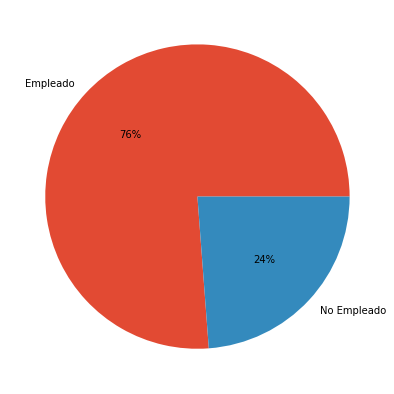

In [ ]:
#@title
#Distribucion o frecuencia de la variable salidad por cada clase
a, b = df['left'].value_counts()
plt.figure(figsize = (15,15))
plt.subplot(121)
plt.pie([a, b], labels=["Empleado", "No Empleado"], autopct="%1.0f%%")
print(df["left"].value_counts())

En los hitogramas observamos que no son muy buenas las ditribuciones de la variables explicativas por lo que necesitaremos aplicar una tecnica de normalizacion estandarizacion para obtener mejores resultados en el modelo.

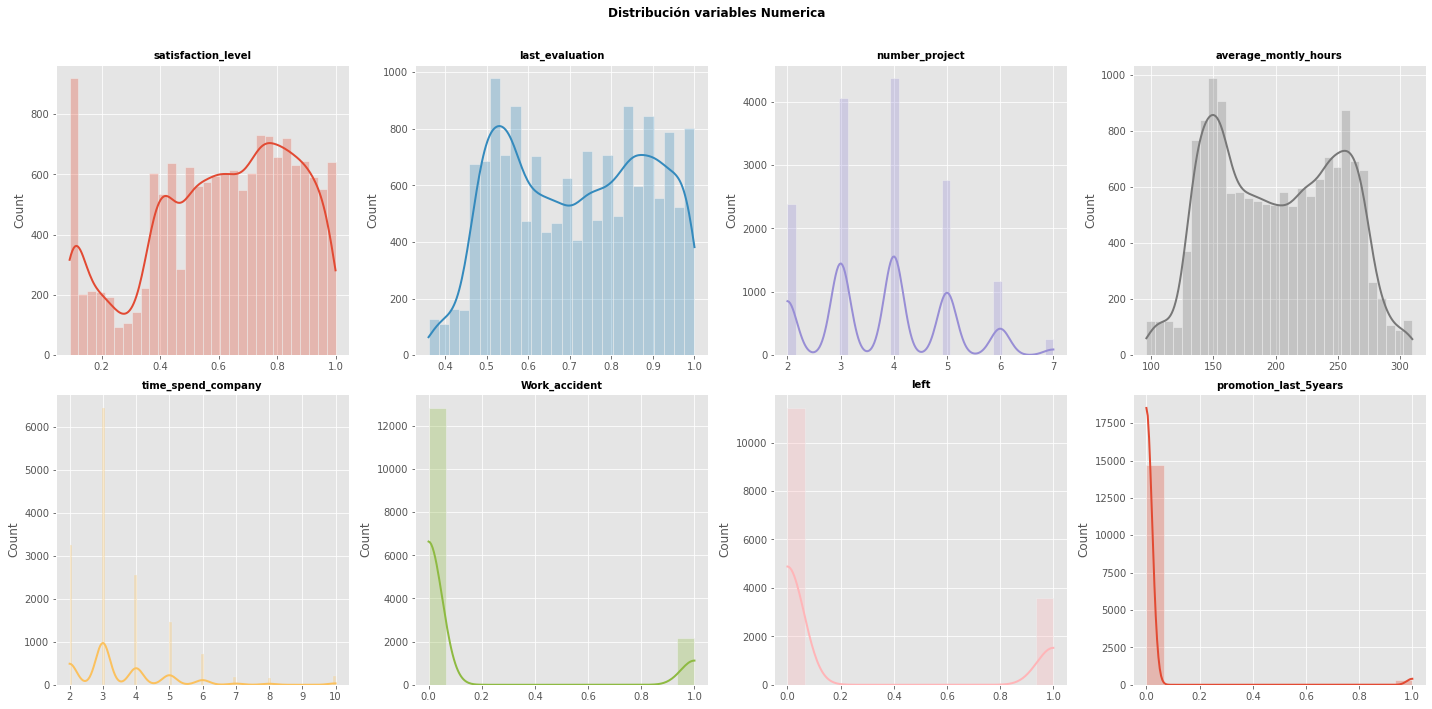

In [ ]:
#@title
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flat
columnas= df.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables Numerica', fontsize = 12, fontweight = "bold");

Los boxplots nos reflejan los outliers en las variables explicativas, sin embargo cabe resaltar que solo la vriable tiempo en la compañia representa valores extremos, no obtante no son significativo porque en la practiva esto es muy comun, para las demas variables dicotomicas no aplica el analisis pero si podemos observar su orientacion.

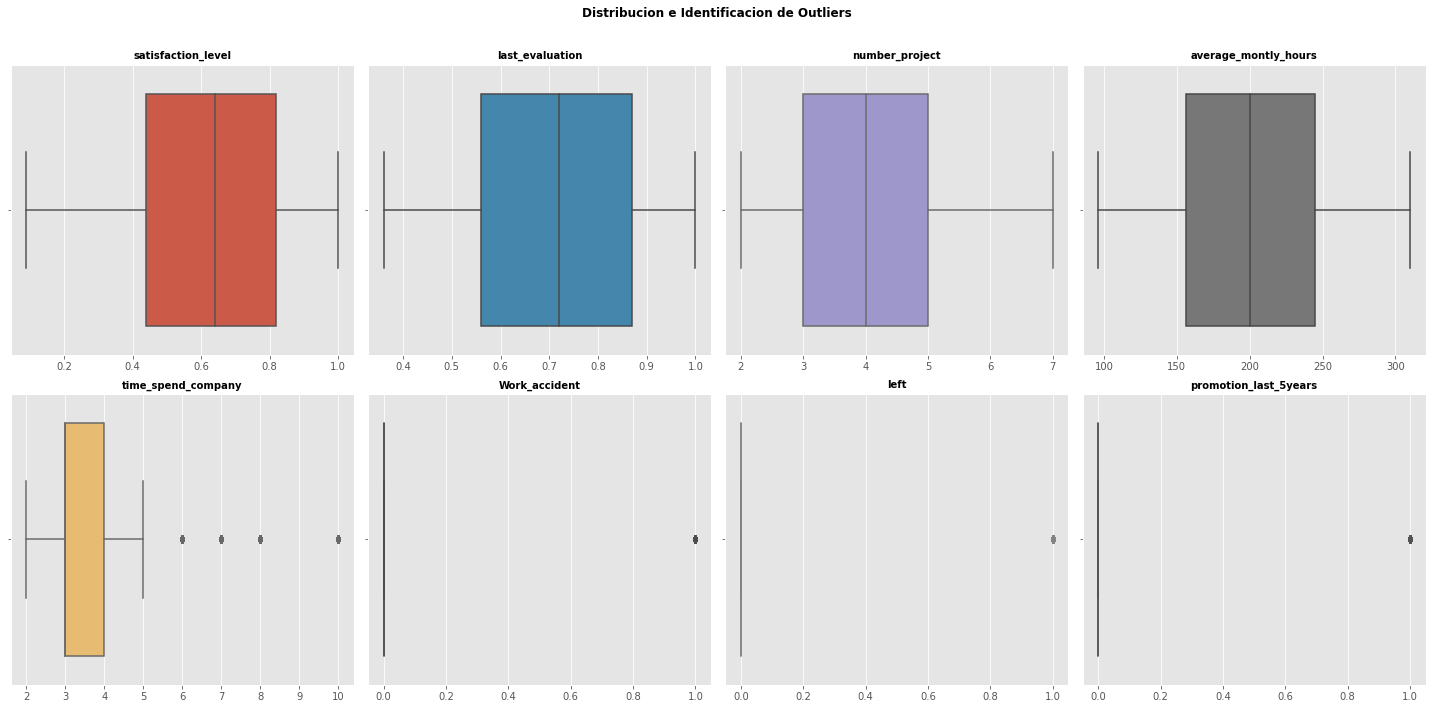

In [ ]:
#@title
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flat
columnas_ = df.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_):
    sns.boxplot(
        data    = df,
        x       = colum,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")



fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribucion e Identificacion de Outliers', fontsize = 12, fontweight = "bold");

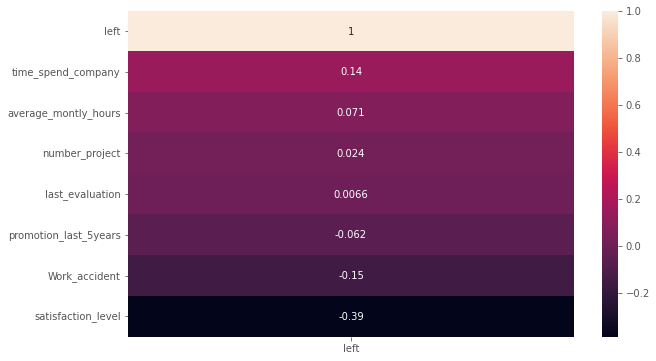

In [ ]:
#Observamos el nivel de correlacion de todas las variables independientes con respectos 'left' o Abandono, variable respuesta.
#Las "satisfaction_level", "promotion_last_5years" & "Work_accident" no significativas o que no aportan un valor para predecir un resultado positivo en la variable repuesta.
plt.figure(figsize = (10,6))
sns.heatmap(df.corr()[['left']].sort_values(by='left', ascending=False), annot = True)
plt.show()

## 2. **FASE PREPROCESAMIENTO**

In [ ]:
#Observamos en el analisis exploratorio que las variables categoricas sales y salary tiene valores unicos 10 y 3 sucecivamente que se repiten por lo que podemos
#usar la tecnica de transformacion Dummies y crear nuevas variables que podemos determinar si son significativa en el modelo.
# Las variables categoricass como sales y salary las convertimos a numerica con "pd.get_dummies"
# (x) crear un array donde almacenamos todas las variables de entradas (Atributos), en este caso eliminamos 'left'

X = df.drop("left", axis = 1)
x_numeric = pd.get_dummies(X)

x_numeric.head()
#Podemos observar las variables salary y sales covertidad en numericas mejor llamadas dummies creador clases representada por un numero entero

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


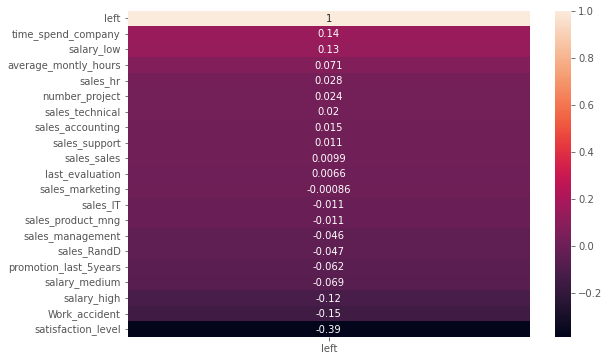

In [ ]:
#Observamos el nivel de correlacion de todas las variables independientes con respectos 'left' la dependiente nuevamente despues de la transformacion.

y = df["left"]
x_numeric["left"] = y
df_transformed = x_numeric

plt.figure(figsize = (9,6))
sns.heatmap(df_transformed.corr()[['left']].sort_values(by='left', ascending=False), annot = True)
plt.show()

In [ ]:
df_transformed.shape

(14999, 21)

In [ ]:
# A raiz del analisis de correlacion decidimos eliminar variables que no son significtivas positivamente para determinar si un empleado dejaria la empresa  ya que tienen una relacion negativas
# e incluso debilmente correlaciona lo que indica que no significativas o que no aportan un valor para predecir un resultado positivo en la variable repuesta.
#var_selecion = ['time_spend_company','salary_low', 'average_montly_hours', 'sales_hr', 'number_project', 'sales_technical', 'sales_accounting', 'sales_support', 'sales_sales', 'last_evaluation', 'left']

df = df_transformed #.drop(["Work_accident", "satisfaction_level","promotion_last_5years" ], axis = 1).copy()

df.head(5)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,...,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,left
0,0.38,0.53,2,157,3,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0.80,0.86,5,262,6,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
2,0.11,0.88,7,272,4,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
3,0.72,0.87,5,223,5,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,0.37,0.52,2,159,3,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [ ]:
#selecionamos nuestra variable dependiente y las independientes

X = df.drop("left", axis = 1)
y = df["left"]

In [ ]:
#Preparamos nuestro set de entrenamiento y prueba con split estractificado ya que existe un desbalance en la variable repuesta.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y ,test_size= 0.2, random_state= 42, stratify= y)

In [ ]:
#Transformamos los datos a formato numpy array, puesto que es el formato requerido por la implementación de KNN de sckit-learn
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [ ]:
#Importamos la tecnica a utilizar para escalar la variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Pasamos la serie a un array de numpy ya que esta tecnica esta optimizada para trabajar con matrices
x_test = scaler.fit_transform(x_test)
x_train = scaler.fit_transform(x_train)


## 3. **FASE ENTRENAMIENTO**

### **Modelizacion**

In [ ]:
# Espeficicamos los diferentes algorimo importados de scikilearn como los modelos de clasificacion con los parametro por defecto
#ya que probaremos cual tiene mejor rendimiento antes de selecionar uno y optimizarlo.
#model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN',  KNeighborsClassifier()))

### **Resultados**

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

results = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits = 10,random_state=42,shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv = skfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
    print(msg)

LR: 0.789400 (0.007544)
KNN: 0.940579 (0.007661)


In [ ]:
#Modelo selecionado KNN

#Modelo KNN Configuracion por defecto k = 5
KNN = KNeighborsClassifier()

##Entrenamiento
modelKNN = KNN.fit(x_train, y_train)

#Predicion de probablidad continua (_prob) de y_train con los datos usado en el entrenamiento
y_pred_train = modelKNN.predict_proba(x_train)
#Predicion de probabilidad continua (_prob) de y_test con los datos de prueba
y_pred_test = modelKNN.predict_proba(x_test)


In [ ]:
#Modelo selecionado LR

#Modelo LG Configuracion por defecto
LR = LogisticRegression()

##Entrenamiento
model_LR = LR.fit(x_train, y_train)

#Predicion de probablidad continua (_prob) de y_train con los datos usado en el entrenamiento
y_pred_train_LR = model_LR.predict_proba(x_train)
#Predicion de probabilidad continua (_prob) de y_test con los datos de prueba
y_pred_test_LR = model_LR.predict_proba(x_test)

## 4. **FASE VALIDACION**

In [ ]:
#Importamos las metricas de validacion ROC_AUC_SCORE, ROC_CURVE y  AUC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [ ]:
#MODELO KNN
# CURVA ROC Y AUC para Training
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# CURVA ROC Y AUC para Test
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

In [ ]:
#MODELO LR
# CURVA ROC Y AUC para Training
fpr_train_LR, tpr_train_LR, _ = roc_curve(y_train, y_pred_train_LR[:, 1])
roc_auc_train_LR = auc(fpr_train_LR, tpr_train_LR)

# CURVA ROC Y AUC para Test
fpr_test_LR, tpr_test_LR, _ = roc_curve(y_test, y_pred_test_LR[:, 1])
roc_auc_test_LR = auc(fpr_test_LR, tpr_test_LR)

Observamos como los modelo se ajustan sin embargo el que mejor se ajusta es el KNN ya que con el set de prueba el cual contiene los datos que el modelo no habia visto, tambien nos arroja resultados muy parecido al set de entrenamiento con un area del 0.97 en comparacion con el entrenamiento de 0.99 por lo que su probabilidad es muy alta a la hora de clasificar si un emplado abandona pero no la sufuciente el area debajo de la curva con el set de test del KNN muestra 2 puntos pon debajo del train tiene oportunidad de optimizacion ya que esto con el tiempo puede convertirse en un problemas de overfitting facilmente sin embargo en el caso de LR existe un problema de underfitting notable ya que el set de test se ajusta mejor que su propios datos de entrenamiento.

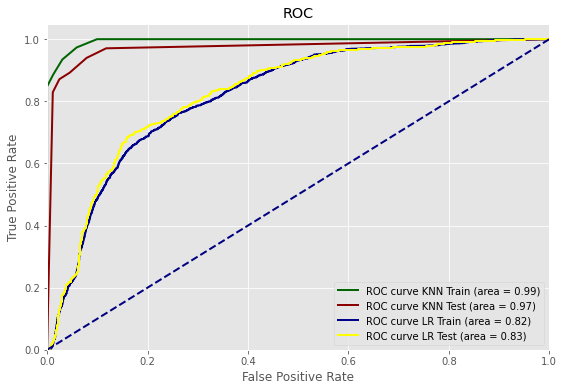

In [ ]:
#@title
plt.figure(figsize = (9,6))
lw = 2

plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw,label="ROC curve KNN Train (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="darkred",lw=lw,label="ROC curve KNN Test (area = %0.2f)" % roc_auc_test,)

plt.plot(fpr_train_LR,tpr_train_LR,color="darkblue",lw=lw,label="ROC curve LR Train (area = %0.2f)" % roc_auc_train_LR,)
plt.plot(fpr_test_LR,tpr_test_LR,color="yellow",lw=lw,label="ROC curve LR Test (area = %0.2f)" % roc_auc_test_LR,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

Podemos observar que su precision en general es casi perfecta y el modelo predice con gran certeza los valores nuevos sin embargo a raiz del desbalance en la data el modelo no predice tan bien la clase de abandono (1) que es su objetivo principal con una diferencia de 8% con el set de entrenamiento y 11% con el set de prueba lo que indica aparte de inclinarse a predecir mejor la clasee 0 a tener tamben un lijero overfitting como vimos el la curva ROC.

In [ ]:
#@title
#KNN Accuracy
#Importamos la metrica de validacion Accuracy

from sklearn.metrics import accuracy_score, classification_report

accuracy_KNN1 = accuracy_score(y_true = y_train,y_pred = modelKNN.predict(x_train)  ,normalize = True)
print(f"El accuracy de training KNN es: {100*accuracy_KNN1:.2f}%")

confusion_matrix = pd.crosstab(
    y_train,
     modelKNN.predict(x_train),
    rownames=['Real'],
    colnames=['Predicción'])

print(confusion_matrix)
print(" ")
print(classification_report(y_train,y_pred = modelKNN.predict(x_train)))

print("--------------------------------------------------------------------------- ")

accuracy_KNN2 = accuracy_score(y_true = y_test,y_pred = modelKNN.predict(x_test) ,normalize = True)
print(f"El accuracy de test KNN es: {100*accuracy_KNN2:.2f}%")

confusion_matrix = pd.crosstab(
    y_test,
     modelKNN.predict(x_test),
    rownames=['Real'],
    colnames=['Predicción']
)
print(confusion_matrix)
print(" ")
print(classification_report(y_test,y_pred = modelKNN.predict(x_test)))

El accuracy de training KNN es: 96.12%
Predicción     0     1
Real                  
0           8864   278
1            187  2670
 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      9142
           1       0.91      0.93      0.92      2857

    accuracy                           0.96     11999
   macro avg       0.94      0.95      0.95     11999
weighted avg       0.96      0.96      0.96     11999

--------------------------------------------------------------------------- 
El accuracy de test KNN es: 94.00%
Predicción     0    1
Real                 
0           2183  103
1             77  637
 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2286
           1       0.86      0.89      0.88       714

    accuracy                           0.94      3000
   macro avg       0.91      0.92      0.92      3000
weighted avg       0.94      0.94      0.94      3000



## 4. **Optimización**

In [ ]:
# Ya que elejimos parametros por defecto, vamos a realizar una optimizacion del modelo en especial en el numero de vecino,
# cual fue  de 5 n_neighbors, esto lo realizaremos con el metodo de la validacion cruzada de sklearn,
# la cual tiene metodos para selecionar el mejor parametro.

from sklearn.model_selection import GridSearchCV

Param_grid = {'n_neighbors': np.arange(1,20)} #parametro numero de vecino de 1:20 verificamos en las regillas cual seria el N.
New_knn = KNeighborsClassifier() #nuevo modelo
New_knn_cv = GridSearchCV(New_knn,
                          Param_grid,
                          cv= 10,
                          scoring = 'roc_auc',
                          n_jobs = 2,
                          verbose = 0,
                          return_train_score = True) #Una validacion cruzada de 10 interaciones.
New_knn_cv.fit(x_train,y_train)

print('Accuracy of K-NN classifier on Best Parameter set: {:.2f}'+ str(New_knn_cv.best_params_))
print('Accuracy of K-NN classifier on Optimized set: {:.2f}'.format(New_knn_cv.best_score_))

Accuracy of K-NN classifier on Best Parameter set: {:.2f}{'n_neighbors': 4}
Accuracy of K-NN classifier on Optimized set: 0.97


Podemos observar que el modelo mejoró con la optmizacion del parametro del numero de vecino, utilizando su K= 5 por defecto, nos recomienda utilizar k=4, sin embargo luego de observar los resultados de los diferentes parametros del Gridsearch  sin duda es el mejor K vemos que incluso no con mejor precision en el trainig nos recomienda k=4 porque a la hora del modelo ver nuevos datos en el test se acerca mas a la precision del training y sus desviacion es menor y esto nos asegura que el no se sobre ajuste posteriormente.

In [ ]:
# Resultados del grid
resultados = pd.DataFrame(New_knn_cv.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_n_neighbors,mean_test_score,std_test_score,mean_train_score,std_train_score
3,4,0.971696,0.006953,0.996063,0.000092
2,3,0.970844,0.006851,0.997830,0.000076
4,5,0.970767,0.006914,0.994368,0.000134
5,6,0.970400,0.006609,0.992740,0.000173
6,7,0.970118,0.006308,0.991243,0.000179
7,8,0.969492,0.006057,0.989883,0.000214
8,9,0.968986,0.005483,0.988566,0.000222
9,10,0.968460,0.005482,0.987358,0.000217
10,11,0.968361,0.005494,0.986272,0.000209
1,2,0.968066,0.006296,0.999292,0.000026


## **TEST 2**
### Entrenar 3 modelos de Arboles de Decisiones para predecir la propensión a abandonar la empresa

#### **OMAR URENA**

En concreto se pide lo siguiente:

Concretamente se pide:

1. Entrenar al menos 3 árboles de decisión diferentes: uno de ellos sin aplicar ningún criterio de poda (sin especificar hiperparámetros) y el resto aplicando diferentes configuraciones de hiperparámetros que controlen el crecimiento del mismo durante el entrenamiento.

2. Identificar y justificar la elección del árbol con mejor poder predictivo.

3. Realizar la representación visual y literal del mejor árbol, y explicar cómo se puede interpretar el mismo.

4. Comparar con los resultados del mejor modelo del TEST 1 y exponer las ventajas que nos aporta uno y otro.

A partir del Sprint 1 ya tenemos los datos con la transfromacion a dummies, la cual es esencial a la hora de entrenar modelos de Decision_tree donde todas las variables predictoras deben ser numericas.

In [ ]:
#Conjunto de Datos Tranformado en dummies

df = df_transformed #.drop(["Work_accident", "satisfaction_level","promotion_last_5years" ], axis = 1).copy()

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,...,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,left
0,0.38,0.53,2,157,3,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0.80,0.86,5,262,6,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
2,0.11,0.88,7,272,4,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
3,0.72,0.87,5,223,5,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,0.37,0.52,2,159,3,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [ ]:
#selecionamos nuestra variable dependiente y las independientes

X = df.drop("left", axis = 1)
y = df["left"]

In [ ]:
#Preparamos nuestro set de entrenamiento y prueba con split estractificado ya que existe un desbalance en la variable repuesta.
from sklearn.model_selection import train_test_split

x_train_, x_test_, y_train_, y_test_ = train_test_split(X,y ,test_size= 0.2, random_state= 42, stratify= y)

## 3. **FASE ENTRENAMIENTO**

### **Modelizacion**

In [ ]:
#Importamo modelo y demas librerias necesarias

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

#### **Modelo1**
1. Parametros

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

In [ ]:
#Modelo clasificador con hiperparametros por default

Dtree = DecisionTreeClassifier(random_state= 42)

model_1 = Dtree.fit(x_train_, y_train_)

y_pred = model_1.predict(x_test_)

ACC_M1 = accuracy_score(y_true = y_test_,y_pred = y_pred ,normalize = True)
print(f"El accuracy de Test DTree es: {100*ACC_M1:.2f}%")


El accuracy de Test DTree es: 97.33%


#### **Modelo 2**

In [ ]:
#Modelo clasificador con el hiperparametro Criterio = Entropia

Dtree1 = DecisionTreeClassifier(criterion = "entropy", random_state= 42 )
model_2 = Dtree1.fit(x_train_, y_train_)

y_pred1 = model_2.predict(x_test_)

ACC_M2 = accuracy_score(y_true = y_test_,y_pred = y_pred1  ,normalize = True)
print(f"El accuracy de Test DTree es: {100*ACC_M2:.2f}%")

El accuracy de Test DTree es: 97.63%


#### **Modelo 3**

In [ ]:
#Modelo clasificador

Dtree2 = DecisionTreeClassifier(max_depth = 7, random_state= 42)

model_3 = Dtree2.fit(x_train_, y_train_)

y_pred2 = model_3.predict(x_test_)

ACC_M3 = accuracy_score(y_true = y_test_,y_pred = y_pred2  ,normalize = True)
print(f"El accuracy de Test DTree es: {100*ACC_M3:.2f}%")

El accuracy de Test DTree es: 97.87%


## 4. **FASE VALIDACION**

El modelo selecionado fue el modelo 3 donde congiguramos el hiperparametro max_depth = 7 por su corto arbol para poder graficar y explicar el modelo, sin embargo aunque este ultimo modelo tuvo mejor precision insluso para la clase 0 como para la clase 1 con 98% en mabos caso, no tiene el mejor recall, es decir para la variable abandono(1) la cual representa los positivos y nos dice la capacidad del modelo para clasificar la clase positiva el modelo 2 es mejor con un 93% contra 96% por lo tanto el modelo 3 a pesar de su gran precision general es menos eficiente clasisficando la clase que nos interesa que el modelo 2 donde solo usamos el hipeparametro criterion = "entropy" y demas hiperparametros por default.


In [ ]:
#@title

print(f"El accuracy de Test M1 es: {100*ACC_M1:.2f}%")

confusion_matrix = pd.crosstab(
    y_test,
     y_pred,
    rownames=['Real'],
    colnames=['Predicción'])

print(confusion_matrix)
print(" ")
print(classification_report(y_test,y_pred))

print("--------------------------------------------------------------------------- ")

print(f"El accuracy de Test M2 es: {100*ACC_M2:.2f}%")

confusion_matrix = pd.crosstab(
    y_test,
     y_pred1,
    rownames=['Real'],
    colnames=['Predicción'])

print(confusion_matrix)
print(" ")
print(classification_report(y_test,y_pred1))

print("--------------------------------------------------------------------------- ")

print(f"El accuracy de Test M3 es: {100*ACC_M3:.2f}%")

confusion_matrix = pd.crosstab(
    y_test,
     y_pred2,
    rownames=['Real'],
    colnames=['Predicción'])

print(confusion_matrix)
print(" ")
print(classification_report(y_test,y_pred2))

El accuracy de Test M1 es: 97.33%
Predicción     0    1
Real                 
0           2231   55
1             25  689
 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2286
           1       0.93      0.96      0.95       714

    accuracy                           0.97      3000
   macro avg       0.96      0.97      0.96      3000
weighted avg       0.97      0.97      0.97      3000

--------------------------------------------------------------------------- 
El accuracy de Test M2 es: 97.63%
Predicción     0    1
Real                 
0           2240   46
1             25  689
 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2286
           1       0.94      0.96      0.95       714

    accuracy                           0.98      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000

---------------------

Podemos observar las variables con importancia o significantes para el modelo a la hora de clasificar, y me parece muy interezante pues el nivel de sastifacion es clave sin embargo en el modelo anterior KNN fue eliminada del dataset por tener un correlacion negativa con la variable respuesta, no obtante la decision no estuvo mal si se tratase de un modelo linel ya que al dataset estar mas inclinado a empleados que se quedan en lugar de abandono esta variable puede ayudar mejor al modelo a decidir 0 en lugar de 1 que es el objetivo. sin embargo esta genial para determinar las importancias de las variables para uso en otros modelo tambien.

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': model_3.feature_importances_}
                            )
print("Mayor Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores[importancia_predictores['importancia'] != 0 ].sort_values('importancia', ascending=False)

Mayor Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,satisfaction_level,0.522799
4,time_spend_company,0.152260
1,last_evaluation,0.142439
2,number_project,0.108186
3,average_montly_hours,0.072674
17,salary_high,0.000538
18,salary_low,0.000474
7,sales_IT,0.000358
16,sales_technical,0.000212
15,sales_support,0.000060


## **Representacion visual del modelo**

**Interpretacion:**: Siguiendo la rama de la izquierdad vemos como el modelo clasifica abandono(1) si el nivel de sastifacion es <= 0.465 si la cantidad de proyectos es <= 2.5, si la ultima evaluacion fue es <= 0.575 o 0.445 si average_montly_hours <= 125.50 pero si average_montly_hours >  125.50 y average_montly_hours <= 162.00 y satisfaction_level <= 0.31 lo clasifica como no abandono(0) sin embargo si cumple todo lo anterior y satisfaction_level >  0.31 entonces es abandono (1).

Ahora si el average_montly_hours >  162.00 y average_montly_hours <= 236.50 el empleado no abandona pero si average_montly_hours <= 236.50 entonces se sigue clasificanndo como un abandono(1).

En la rama de la derecha podemos observar que si satisfaction_level >  0.45 y average_montly_hours <= 200.50 se clasifica como no abandono(0) sin embargo si average_montly_hours >  200.50 el emplado abanona(1)


Estas son algunas de las interpretaciones del arbol ya que es bastante grande para el notebook.


Profundidad del árbol: 7
Número de nodos terminales: 50


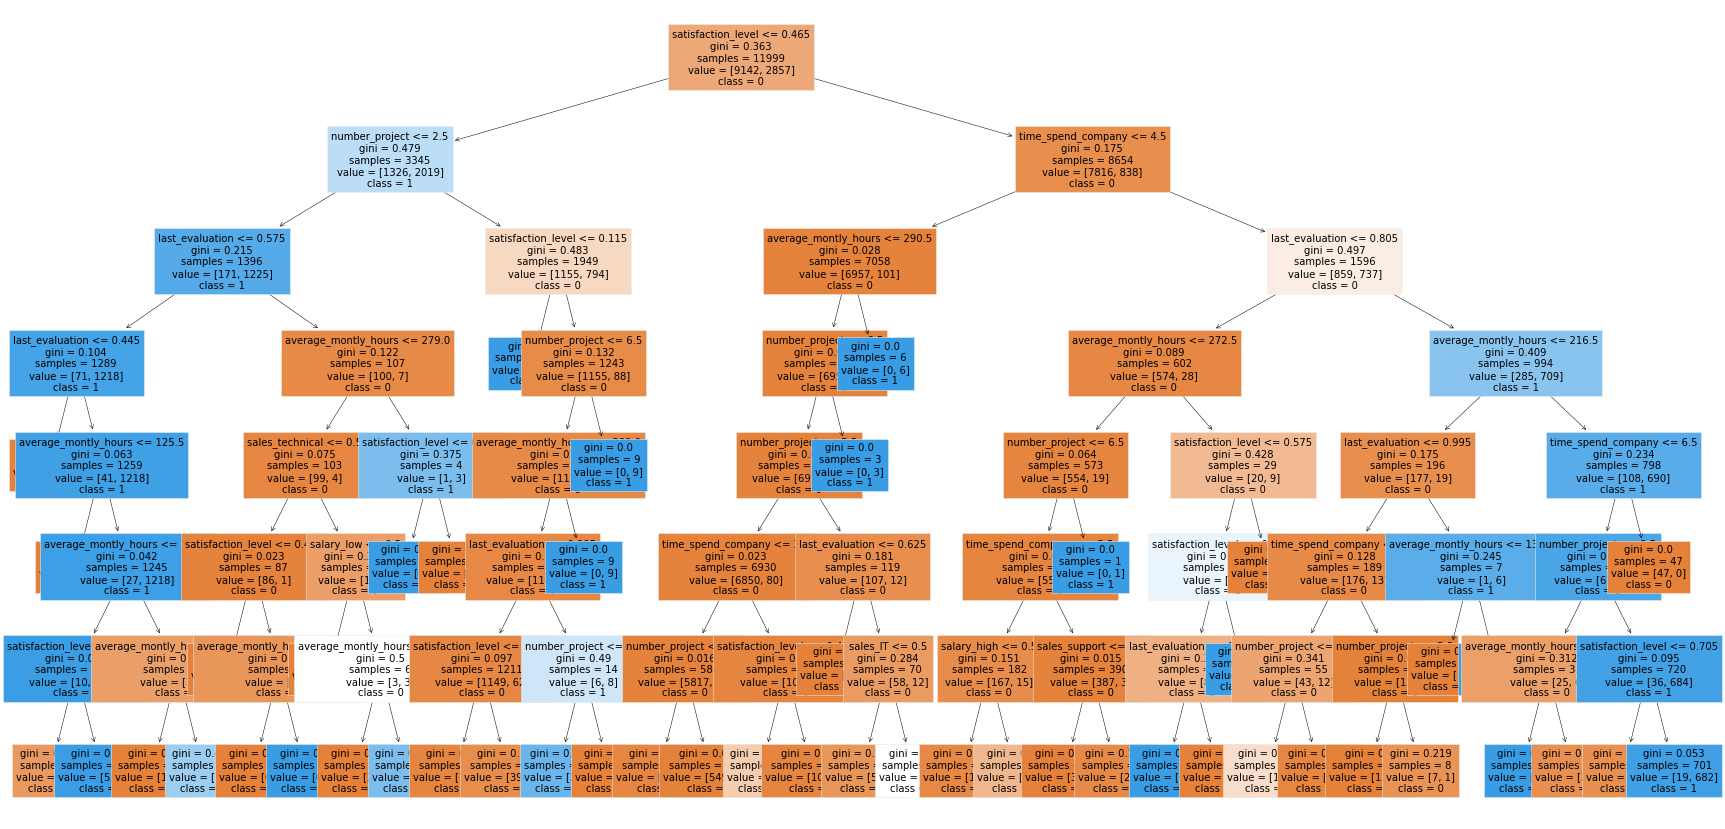

In [ ]:
#@title
# TREE_MODEL 3
from sklearn.tree import plot_tree, export_text

fig, ax = plt.subplots(figsize=(30, 15))

print(f"Profundidad del árbol: {model_3.get_depth()}")
print(f"Número de nodos terminales: {model_3.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model_3,
            feature_names = X.columns,
            class_names   = ['0','1'],
            filled        = True,
            impurity      = True,
            fontsize      = 10,
            ax            = ax
       )
plt.show()

## Representacion literal del modelo

In [ ]:
#@title
#Representacion en formato literal
Rpresentacion_textual = export_text(decision_tree = model_3,
                                    feature_names = list(X.columns))
print(Rpresentacion_textual)

|--- satisfaction_level <= 0.47
|   |--- number_project <= 2.50
|   |   |--- last_evaluation <= 0.57
|   |   |   |--- last_evaluation <= 0.44
|   |   |   |   |--- class: 0
|   |   |   |--- last_evaluation >  0.44
|   |   |   |   |--- average_montly_hours <= 125.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- average_montly_hours >  125.50
|   |   |   |   |   |--- average_montly_hours <= 162.00
|   |   |   |   |   |   |--- satisfaction_level <= 0.31
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- satisfaction_level >  0.31
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- average_montly_hours >  162.00
|   |   |   |   |   |   |--- average_montly_hours <= 236.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- average_montly_hours >  236.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |--- last_evaluation >  0.57
|   |   |   |--- average_montly_hours <= 279.00
|   |   |   |   |--- sales_technical <= 0.50
|   |  

## **Comparacion TEST 1 & 2**

Comparando los modelos Knn y el DTree selecionados, podemos empezar en que son dos algoritmos no parametricos es decir que no la distribucion de la data no puede ser definida, en otras no dependen de la distribucion de la data para su resultado,y podemos destacar que el arbol de decision puede realizan funciones automatizadas como definir la importacia de las variables para su ramificacion, facil de entender, menos limpieza de datos sim embargo aunque se pueden sobre ajustar facil cuenta com hiperparametros facil de configurar para evitalo como el max_depth o Máxima profundidad del árbol, su deventaja principal son los cambio en el resultado por un pequeño cambio en los datos que incluso podria cambiar toda la estructura. En cambio KNN son mas lentos con grande dataset hay que hacer varias transformaciones a la data como scalarla, sensible a valores extremos y perdido en cambio el arbol no les afectan y la clase desbalanceada es un gran problema.

En resumen el arbol de decision es mucho mas sencillo y puede resultal mas robustos a la hora de obtener resultados a pesar de que demande mas recursos computacionales.

In [ ]:
#@title
print('SPRINT 1')
accuracy_KNN2 = accuracy_score(y_true = y_test,y_pred = modelKNN.predict(x_test) ,normalize = True)
print(f"El accuracy de test KNN es: {100*accuracy_KNN2:.2f}%")

confusion_matrix = pd.crosstab(
    y_test,
     modelKNN.predict(x_test),
    rownames=['Real'],
    colnames=['Predicción']
)
print(confusion_matrix)
print(" ")
print(classification_report(y_test,y_pred = modelKNN.predict(x_test)))

print("--------------------------------------------------------------------------- ")

print('SPRINT 2')
print(f"El accuracy de Test DTree M3 es: {100*ACC_M3:.2f}%")

confusion_matrix = pd.crosstab(
    y_test,
     y_pred2,
    rownames=['Real'],
    colnames=['Predicción'])

print(confusion_matrix)
print(" ")
print(classification_report(y_test,y_pred2))

SPRINT 1
El accuracy de test KNN es: 94.00%
Predicción     0    1
Real                 
0           2183  103
1             77  637
 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2286
           1       0.86      0.89      0.88       714

    accuracy                           0.94      3000
   macro avg       0.91      0.92      0.92      3000
weighted avg       0.94      0.94      0.94      3000

--------------------------------------------------------------------------- 
SPRINT 2
El accuracy de Test DTree M3 es: 97.87%
Predicción     0    1
Real                 
0           2270   16
1             48  666
 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2286
           1       0.98      0.93      0.95       714

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      30

## **TEST 3**
### Empleo de métodos de ensemble para predecir la propensión de abandono de la empresa

#### **OMAR URENA**

Concretamente se pide:

1. Aplicar al menos dos tipos diferentes de ensemble (uno de Bagging y otro de Boosting), empleando como modelo base los árboles de decisión y probando con dos configuraciones de hiperparámetros diferentes para cada tipo de ensemble elegido.

2. Comparar y discutir los resultados, identificando el mejor ensemble en cuanto a poder predictivo.

3. Obtención de las variables más relevantes del modelo. ¿Tiene sentido que sean las variables con mayor peso?


In [ ]:
#Conjunto de Datos Tranformado en dummies

df = df_transformed #.drop(["Work_accident", "satisfaction_level","promotion_last_5years" ], axis = 1).copy()

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,...,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,left
0,0.38,0.53,2,157,3,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0.80,0.86,5,262,6,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
2,0.11,0.88,7,272,4,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
3,0.72,0.87,5,223,5,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,0.37,0.52,2,159,3,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [ ]:
#selecionamos nuestra variable dependiente y las independientes

X = df.drop("left", axis = 1)
y = df["left"]

In [ ]:
#Preparamos nuestro set de entrenamiento y prueba con split estractificado ya que existe un desbalance en la variable repuesta.
from sklearn.model_selection import train_test_split

x_train_, x_test_, y_train_, y_test_ = train_test_split(X,y ,test_size= 0.2, random_state= 42, stratify= y)

## 3. **FASE ENTRENAMIENTO**

### **Modelizacion**


In [ ]:
#Importamo modelo y demas librerias necesarias

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

#### Ensemble Bagging



**RandomForestClassifier**

**PARAMETROS:**
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Modelo RandomForestClassifier con hiperparametros por default

RFC = RandomForestClassifier(random_state= 42)

model_rfc = RFC.fit(x_train_, y_train_)

y_pred = model_rfc.predict(x_test_)

ACC_rfc= accuracy_score(y_true = y_test_,y_pred = y_pred ,normalize = True)
print(f"El accuracy de Test RFC es: {100*ACC_rfc:.2f}%")


El accuracy de Test RFC es: 99.03%


In [ ]:
#@title
confusion_matrix = pd.crosstab(
    y_test_,
     model_rfc.predict(x_test_),
    rownames=['Real'],
    colnames=['Predicción']
)
print(confusion_matrix)
print(" ")
print(classification_report(y_test_,y_pred = model_rfc.predict(x_test_)))

Predicción     0    1
Real                 
0           2283    3
1             26  688
 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       1.00      0.96      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [ ]:
#Modelo RandomForestClassifier con hiperparametros Modificados

RFC_M = RandomForestClassifier(random_state= 42, max_features = 5, max_samples = 11998, n_estimators= 200, n_jobs=2)

model_rfc_m = RFC_M.fit(x_train_, y_train_)

y_pred_m = model_rfc_m.predict(x_test_)

ACC_rfc_m = accuracy_score(y_true = y_test_,y_pred = y_pred_m, normalize = True )
print(f"El accuracy de Test RFC es: {100*ACC_rfc_m:.2f}%")

El accuracy de Test RFC es: 99.10%


In [ ]:
#@title
confusion_matrix = pd.crosstab(
    y_test_,
     model_rfc_m.predict(x_test_),
    rownames=['Real'],
    colnames=['Predicción']
)
print(confusion_matrix)
print(" ")
print(classification_report(target_names = ['No abandono', 'Abandono'],  y_true= y_test_,y_pred = model_rfc_m.predict(x_test_),digits= 3))

Predicción     0    1
Real                 
0           2283    3
1             24  690
 
              precision    recall  f1-score   support

 No abandono      0.990     0.999     0.994      2286
    Abandono      0.996     0.966     0.981       714

    accuracy                          0.991      3000
   macro avg      0.993     0.983     0.987      3000
weighted avg      0.991     0.991     0.991      3000



#### Ensemble Boosting

**AdaBoostongClassifier**

1. Parametros DecisionTree

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

2. parameters AdaBoosting

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
#Modelo AdaBoostClassifier con hiperparametros por default
Pipeline = make_pipeline(StandardScaler(),
                         AdaBoostClassifier(
                             DecisionTreeClassifier( random_state= 42),
                             algorithm= 'SAMME.R'
                            ,random_state= 42)
                         )

model_boost = Pipeline.fit(x_train_, y_train_)

y_pred_boost = model_boost.predict(x_test_)

ACC_boost= accuracy_score(y_true = y_test_,y_pred = y_pred_boost ,normalize = True)
print(f"El accuracy de Test AdaBoost es: {100*ACC_boost:.2f}%")

El accuracy de Test AdaBoost es: 97.60%


In [ ]:
#Modelo AdaBoostClassifier con hiperparametros Modificados
Pipeline_m = make_pipeline(StandardScaler(),
                         AdaBoostClassifier(
                             DecisionTreeClassifier( max_depth=10,random_state= 42),
                             algorithm= 'SAMME'
                             ,n_estimators = 1000
                             ,learning_rate= 0.01
                            ,random_state= 42)
                         )

model_boost_m = Pipeline_m.fit(x_train_, y_train_)

y_pred_boost_m = model_boost_m.predict(x_test_)

ACC_boost_m= accuracy_score(y_true = y_test_,y_pred = y_pred_boost_m ,normalize = True)
print(f"El accuracy de Test AdaBoost es: {100*ACC_boost_m:.2f}%")

El accuracy de Test AdaBoost es: 98.57%


In [ ]:
#@title
confusion_matrix = pd.crosstab(
    y_test_,
     model_boost_m.predict(x_test_),
    rownames=['Real'],
    colnames=['Predicción']
)
print(confusion_matrix)
print(" ")
print(classification_report(y_test_,y_pred = model_boost_m.predict(x_test_)))

Predicción     0    1
Real                 
0           2270   16
1             40  674
 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2286
           1       0.98      0.94      0.96       714

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



#### Comparativas Ensembles

Luego de implementar las dos tenicas de modelizacion de ensambles para crear un solo modelo y obterner el mejor resultado, me gustaria antes de mostrar cual ensamblaje dio mejor resultado y con cual me quedo, repasar lo siguiente...

**cual es la principal diferencia de estas tecnicas de apredisaje:**

La principal diferencia entre Bagging y Boosting es que en el Bagging los submodelos son independientes y se promedian para obtener un modelo final, mientras que en el Boosting los submodelos se entrenan de manera incremental para corregir los errores del submodelo anterior.

Ahora bien el ensemble mas sencillo y a las vez mas robusto fue el Bagging, siendo especifico el RandomForestClassifier este ensemble con los hiperametros por defecto me resulto mejor que el AdaBoostClassifier con modelo base DecisionTree pero sin duda que son unas tecnicas muy avanzadas que hay que practicarlas y estudiarlas para tener un mayor dominio, pero entiendo que para iniciar la mas adecuada es Bagging porque Boosting por su naturaleza puede llegar a tener un accuracy sesgado por un sobreajuste mas facilmente que el Bagging sin embargo al bagging estar compuesto por modelos independientes que se promedian si se hace una buena configuracion de los hipers se pueden obtener resultado tan buenos como el boosting y evitar el sobreajuste a futuro.

**MEJOR MODELO BAGGING RANDOMFORESTCLASSIFIER**

In [ ]:
#@title
confusion_matrix = pd.crosstab(
    y_test_,
     model_rfc_m.predict(x_test_),
    rownames=['Real'],
    colnames=['Predicción']
)
print(confusion_matrix)
print(" ")
print(classification_report(target_names = ['No abandono', 'Abandono'],  y_true= y_test_,y_pred = model_rfc_m.predict(x_test_),digits= 3))

Predicción     0    1
Real                 
0           2283    3
1             24  690
 
              precision    recall  f1-score   support

 No abandono      0.990     0.999     0.994      2286
    Abandono      0.996     0.966     0.981       714

    accuracy                          0.991      3000
   macro avg      0.993     0.983     0.987      3000
weighted avg      0.991     0.991     0.991      3000



#### Importancia de las variables del mejor modelo por precision

Estas variables y sus nivel de importancia tienen bastante sentido, en la realidad el nivel de sastifacion es decir como nos sentimos, el tiempo en la compañia donde se refleja el compromiso o si solo tenermos poco tiempo y obtenemos otra oferta, la cantidad de horas de trabajo que refleja el balance con nuestra vida personal, el salario bajo son varibales que se toman mucho en cuenta a la hora de tomar una decision para cambiar de trabajo.

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': model_rfc_m.feature_importances_}
                            )
print("Mayor Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores[importancia_predictores['importancia']  != 0].sort_values('importancia', ascending=False)

Mayor Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,satisfaction_level,0.316840
4,time_spend_company,0.185061
2,number_project,0.170145
3,average_montly_hours,0.157533
1,last_evaluation,0.127438
5,Work_accident,0.008332
18,salary_low,0.006208
17,salary_high,0.004559
16,sales_technical,0.003556
14,sales_sales,0.003391


**Grafico**

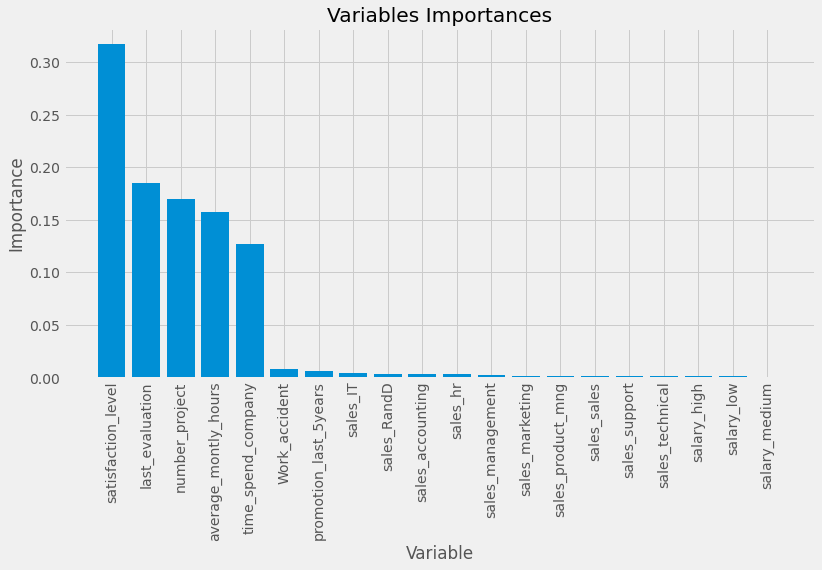

In [ ]:
#@title
# asignamos un estilo
plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,6))

# Sacamos los valores de la x
x_values = list(range(len(importancia_predictores['importancia'])))
feature = X.columns


# Creamos el gráfico de barras
plt.bar(x_values, importancia_predictores['importancia'].sort_values(ascending=False), orientation = 'vertical')

# ponemos etiquetas Tick en el eje de las x
plt.xticks(x_values, feature, rotation='vertical')

# personalizamos el eje y
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variables Importances')

plt.show()

**PRAMETROS PARA BAGGING Y ESTIMADOR BASE:**

**Base:**
n_neighbors = 5

 **Bagging:**

 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Emsembles Bagging utilizando KNN como modelo base

pipeline_o = make_pipeline(StandardScaler(),
                        KNeighborsClassifier(n_neighbors= 4))

BGC = BaggingClassifier(base_estimator= pipeline_o, random_state= 1, n_estimators= 100, max_features = 10, n_jobs= 2)

BGC_MODEL = BGC.fit(x_train_, y_train_)

y_pred_BGC = BGC_MODEL.predict(x_test_)

ACC_BGC= accuracy_score(y_true = y_test_,y_pred = y_pred_BGC ,normalize = True)
print(f"El accuracy de Test BGC es: {100*ACC_BGC:.2f}%")

El accuracy de Test BGC es: 97.77%


## **FASE FINAL**
#### Mejorar los resultados del proyecto aplicando técnicas de búsqueda exhaustiva (Grid Search) o búsqueda aleatoria (Random Search)
#### **OMAR URENA**

En concreto se pide lo siguiente:

1. Partiendo de la información obtenida en el TEST 3 sobre las variables más mportantes para el modelo de conjunto elegido, re-entrenar dicho modelo utilizando las variables más importantes y discutir las diferencias apreciadas tanto en calidad de las predicciones como en velocidad de entrenamiento.
2. Definir el rango de valores posibles para al menos dos hiperparámetros del mejor modelo elegido de los sprints anteriores, y utilizar la clase GridSearchCV o RandomizedSearchCV para encontrar la combinación de los mismos que da el mejor resultado para la métrica de puntuación que se define.
3. Analizar, discutir y comparar los resultados obtenidos por las diferentes combinaciones de hiperparámetros y dejar reflejadas las conclusiones obtenidas en el cuaderno que se entregue.

Todas las conclusiones extraídas deben estar soportadas por métricas o visualizaciones (curva ROC, matriz de confusión, etc.) que justifican lo que se está defendiendo.

Fase adicional:  Probar alguna técnica de muestreo para el manejo del balanceo de las clases (under-sampling, over-sampling, etc.) y comprobar si mejoran o empeoran los resultados obtenidos por el mejor modelo seleccionado en los sprints anteriores.

### **SELECCION DE VARIABLES MAS IMPORTANTES**

In [ ]:
top10_importance_var = ['satisfaction_level', 'time_spend_company', 'number_project', 'average_montly_hours', 'last_evaluation']

Partiendo de las viariables mas importante para el modelo RandomForestClassifier con los hiperparametros modificados elegimos el top 5 de las 21 variables luego de la transformacion one hot encoding que explican en un 95.5% el modelo para determinar si es posible simplificar el modelo o si cambia nuestra precision significativamente.

 ['satisfaction_level(31.6%)', '	time_spend_company(18.5)', 'number_project(17.0)', 'average_montly_hours(15.8)', 'last_evaluation(12.7)']

In [ ]:
#selecionamos nuestra variable dependiente y las independientes

x = df[top10_importance_var]
y = df["left"]

In [ ]:
#Preparamos nuestro set de entrenamiento y prueba con split estractificado ya que existe un desbalance en la variable repuesta
#y nos ayuda a tener una mejor division.
from sklearn.model_selection import train_test_split

x_train_, x_test_, y_train_, y_test_ = train_test_split(x,y ,test_size= 0.2, random_state= 42, stratify= y)

## 3. **FASE ENTRENAMIENTO**

In [ ]:
#Modelo RandomForestClassifier con hiperparametros Modificados y variables mas importantes

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

RFC_M = RandomForestClassifier(random_state= 42, max_features = 5, max_samples = 11998, n_estimators= 200, n_jobs=2)

model_rfc_m = RFC_M.fit(x_train_, y_train_)

y_pred_m = model_rfc_m.predict(x_test_)

ACC_rfc_m = accuracy_score(y_true = y_test_,y_pred = y_pred_m, normalize = True )
print(f"El accuracy de Test RFC es: {100*ACC_rfc_m:.2f}%")

El accuracy de Test RFC es: 98.87%


In [ ]:
#@title

confusion_matrix = pd.crosstab(
    y_test_,
     model_rfc_m.predict(x_test_),
    rownames=['Real'],
    colnames=['Predicción']
)
print(confusion_matrix)
print(" ")
print(classification_report(target_names = ['No abandono', 'Abandono'],  y_true= y_test_,y_pred = model_rfc_m.predict(x_test_),digits= 3))

Predicción     0    1
Real                 
0           2275   11
1             23  691
 
              precision    recall  f1-score   support

 No abandono      0.990     0.995     0.993      2286
    Abandono      0.984     0.968     0.976       714

    accuracy                          0.989      3000
   macro avg      0.987     0.981     0.984      3000
weighted avg      0.989     0.989     0.989      3000



Podemos observar que con una precision general de 98.9 la matriz de confusión para este modelo nos dice que ha clasificado 2,275 casos correctamente como "No abandono" y 691 casos correctamente como "Abandono". Sin embargo, el modelo también se equivó en 11 casos falsos positivos es decir, (clasificando como "Abandono" cuando en realidad era "No abandono") y 23 falsos negativos (clasificando como "No abandono" cuando en realidad era "Abandono").

En comparacion con modelo original elegido con todas las variables que con una precision de 99.10 la matriz de confusión para el model nos muestra que clasificó 2,283 como clase 0 "No abandono" y 690 casos de la clase 1 como "Abandono" Este modelo tuvo menos falsos positivos (3 en lugar de 11), aunque con todas las variables el modelo parece ser un poco mejor en términos de falsos positivos, ambos modelos son muy buenos en las metricas en generales, la precision es muy buena para acertar en todos los casos, para el Recall que mide la proporción de casos positivos que fueron correctamente identificados por el modelo, el modelo simplificado es un poco mejor predijo un caso mas y en la metrica F1 que es una medida combinada de precisión y recall que es útil para evaluar el rendimiento general del modelo. En ambos modelos, el F1-score es alto para ambas clases, por lo que nos dice que ambos modelos son buenos para clasificar las clases como "No abandono" y "Abandono".

En conlusion, sacrificaria un poco de precision y simplificaria el modelo hasta este punto ya que la misma no es muy significativa pero si tendria un modelo mas facil de explicar, rapido de entrenar, simple y a la vez muy robusto pasando de 21 variables a 5 variables con la opcion aun de optimizar los hipers y posiblemente obtener una mejora.


##  **OPTIMIZACION**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

Utilizaremos la tecnica de RandomizedSearchCV para buscar la aproximacion de los mejores hiperparametros y luego para afinar aplicaremos el GridSearchCV alrrededor de los mismo para optener los mas precisos y esto lo realizaremos a  traves de la metrica recall debido a que El recall mide la proporción de casos positivos que fueron correctamente identificados por el modelo, en este caso el obetivo es predecir lo mas correcto posible la clase 1 con un modelo simplificado, ya que perdimos un poco de precision en la misma al simplificar el modelo, buscaremos recuperar esa perdida optimizando los hiper.

In [ ]:
#Modelo
RFO = RandomForestClassifier()

#Hiperparametros
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(100, 1000, num=20)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(5, 100, num=10)],
    'min_samples_split':[2,3,4,5,10,15,20],
    'min_samples_leaf': [1,2,4,5,10,15,20]
}

#Búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=RFO,
                                   param_distributions = param_dist,
                                   n_iter=10,
                                   cv=5,
                                   scoring='recall',
                                   n_jobs=2,
                                   random_state=42
                                   ,return_train_score = True)

#Ajustar Modelo
random_search.fit(x_train_, y_train_)

print('F1 of RF classifier on Best Parameter set: {:.2f}'+ str(random_search.best_params_))

F1 of RF classifier on Best Parameter set: {:.2f}{'n_estimators': 810, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 78}


A partir de los resultados optenidos en la busqueda aleatoria ya conocemos los rangos por donde rondan los mejores hiperparametros por lo que podemos definir unos valores mas cercanos alrrededor de los mismos en caso de no estar conforme con los resultados y para esto podemos continuar con GridSearch de ser necesario y ver si podemos mejorar.

In [ ]:
# Resultados del RandomSearch
resultados = pd.DataFrame(random_search.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
4,810,2,1,sqrt,78,0.969551,0.007045,1.000000,0.000000
9,573,4,2,log2,57,0.943645,0.007224,0.971824,0.002041
5,289,5,2,auto,47,0.941196,0.009312,0.968499,0.000727
1,810,15,1,sqrt,57,0.921945,0.009251,0.929296,0.001296
0,763,20,1,auto,89,0.920895,0.009100,0.924659,0.002170
3,573,5,5,log2,15,0.913897,0.009860,0.923346,0.001400
8,336,15,4,auto,26,0.913895,0.011373,0.921421,0.001587
6,289,10,5,log2,36,0.913546,0.010419,0.923521,0.001222
7,952,20,5,sqrt,78,0.911797,0.012101,0.916171,0.003316
2,100,3,20,auto,5,0.907947,0.014067,0.909258,0.002778


In [ ]:
#Modelo
RFO = RandomForestClassifier()

#Hiperparametros
param_dist = {
    'n_estimators': np.arange(800,900, 10),
    'max_features': ['sqrt'],
    'max_depth': np.arange(70,90, 2),
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

#Búsqueda Estimada
RFO_grid = GridSearchCV(RFO,
                          param_dist,
                          cv= 5,
                          scoring = 'recall',
                          n_jobs =-1,
                          verbose = 0,
                          return_train_score = True)
#Ajustar el Modelo
RFO_grid.fit(x_train_,y_train_)

print('F1 of RF classifieron Best Parameter set: {:.2f}'+ str(RFO_grid.best_params_))
print('F1 of RF classifier on Optimized set: {:.2f}'.format(RFO_grid.best_score_))

F1 of RF classifieron Best Parameter set: {:.2f}{'max_depth': 74, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 850}
F1 of RF classifier on Optimized set: 0.97


In [ ]:
# Resultados del GridSearch
resultados = pd.DataFrame(RFO_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
25,74,sqrt,1,2,850,0.969901,0.006759,1.0,0.0
85,86,sqrt,1,2,850,0.969901,0.006759,1.0,0.0
53,80,sqrt,1,2,830,0.969901,0.006759,1.0,0.0
56,80,sqrt,1,2,860,0.969901,0.006759,1.0,0.0
72,84,sqrt,1,2,820,0.969551,0.007045,1.0,0.0
71,84,sqrt,1,2,810,0.969551,0.007045,1.0,0.0
69,82,sqrt,1,2,890,0.969551,0.007045,1.0,0.0
68,82,sqrt,1,2,880,0.969551,0.007045,1.0,0.0
67,82,sqrt,1,2,870,0.969551,0.007045,1.0,0.0
66,82,sqrt,1,2,860,0.969551,0.007045,1.0,0.0


Aplicamos los hiperparametros obtenidos en las busqueda, donde apreciamos una mejora en el modelo en general aumentando su F1 de 97.6 a 97.9 metrica que nos da la combinacion de la precision y el Recall por lo tanto con certeza vale la pena simplificar el modelo.

In [ ]:
#Modelo final simplificado a traves de las variables con mayor importancia y con los hiperparametros optimizados

RFO= RandomForestClassifier(random_state= 1,max_depth=74, max_features = 'sqrt', min_samples_leaf= 1, min_samples_split=2, n_estimators= 850)

MODEL_FINAL = RFO.fit(x_train_, y_train_)

y_pred_t = MODEL_FINAL.predict(x_train_)
y_pred_m = MODEL_FINAL.predict(x_test_)


ACC_rfc_t = accuracy_score(y_true = y_train_,y_pred = y_pred_t, normalize = True )
print(f"El accuracy de Training RFC es: {100*ACC_rfc_t:.2f}%")

ACC_rfc_m = accuracy_score(y_true = y_test_,y_pred = y_pred_m, normalize = True )
print(f"El accuracy de Test RFC es: {100*ACC_rfc_m:.2f}%")

El accuracy de Training RFC es: 99.98%
El accuracy de Test RFC es: 99.03%


In [ ]:
#@title
confusion_matrix = pd.crosstab(
    y_test_,
     MODEL_FINAL.predict(x_test_),
    rownames=['Real'],
    colnames=['Predicción']
)
print(confusion_matrix)
print(" ")
print(classification_report(target_names = ['No abandono', 'Abandono'],  y_true= y_test_,y_pred = MODEL_FINAL.predict(x_test_),digits= 3))

Predicción     0    1
Real                 
0           2281    5
1             24  690
 
              precision    recall  f1-score   support

 No abandono      0.990     0.998     0.994      2286
    Abandono      0.993     0.966     0.979       714

    accuracy                          0.990      3000
   macro avg      0.991     0.982     0.987      3000
weighted avg      0.990     0.990     0.990      3000



###**Opcional Muestreo**

Esta fase podemos apreciar como influye aplicar la tecnica de muestreo para balancear las clases en las problematicas donde es necesario a raiz de un desbalanceo en las clase y el modelo no aprede bien a predecir la clase postiva en la variables respuesta, para ellos en los casos que la clase 1 es minoritaria como este caso se aplica el oversampling de los contrario podria ser el undersampling si quisieramos reducir la clase mayoritaria pero es mas recomendable utilizar over porque con el under estaria reduciendo muestra aleatoria o bien estratigicamente pero seria un problema mayor si la mayoritaria no tiene la informacion suficiente y se reduce, todo depende del conjunto de datos y el objetivo a predecir del modelo.

In [ ]:
# Aplicar SMOTE para sobremuestrear la clase minoritaria CLASE 1

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train_resampled, y_train_resampled = smote.fit_resample(x_train_, y_train_)

In [ ]:
#Modelo final simplificado a traves de las variables con mayor importancia y con los hiperparametros optimizados

RFO= RandomForestClassifier(random_state= 1,max_depth=74, max_features = 'sqrt', min_samples_leaf= 1, min_samples_split=2, n_estimators= 850)

MODEL_FINAL = RFO.fit(x_train_resampled, y_train_resampled)

y_pred_t = MODEL_FINAL.predict(x_train_resampled)
y_pred_m = MODEL_FINAL.predict(x_test_)


ACC_rfc_t = accuracy_score(y_true = y_train_resampled,y_pred = y_pred_t, normalize = True )
print(f"El accuracy de Training RFC es: {100*ACC_rfc_t:.2f}%")

ACC_rfc_m = accuracy_score(y_true = y_test_,y_pred = y_pred_m, normalize = True )
print(f"El accuracy de Test RFC es: {100*ACC_rfc_m:.2f}%")

El accuracy de Training RFC es: 99.99%
El accuracy de Test RFC es: 98.87%


In [ ]:
#@title
confusion_matrix = pd.crosstab(
    y_test_,
     MODEL_FINAL.predict(x_test_),
    rownames=['Real'],
    colnames=['Predicción']
)
print(confusion_matrix)
print(" ")
print(classification_report(target_names = ['No abandono', 'Abandono'],  y_true= y_test_,y_pred = MODEL_FINAL.predict(x_test_),digits= 3))

Predicción     0    1
Real                 
0           2274   12
1             22  692
 
              precision    recall  f1-score   support

 No abandono      0.990     0.995     0.993      2286
    Abandono      0.983     0.969     0.976       714

    accuracy                          0.989      3000
   macro avg      0.987     0.982     0.984      3000
weighted avg      0.989     0.989     0.989      3000



Podemos observar como el oversampling mejoró la metrica del recall ayudando al aumentar las muestras de las clase 1 y poder clasificar  mas caso TP sin embargo en niveles generales afecto un poco la precision para la clase 1  ya que aumentaron los FP (cuando eran no abandono lo clasifico como abandono ).por lo tanto la mejora no fue significativa, ni afecta significativamente el modelo, no seria necesario aplicar esta tecnica con el redimiento que ya posee el modelo final.